<a href="https://colab.research.google.com/github/Revanth980727/Computational-Physics-PHYS-5070/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Required Modules 
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Set the random seeds. Do not change this!
seedVal = 41
random.seed(seedVal)
np.random.seed(seedVal)



In [3]:
!git clone https://github.com/Revanth980727/Computational-Physics-PHYS-5070.git

fatal: destination path 'Computational-Physics-PHYS-5070' already exists and is not an empty directory.


Here, we are reading input data here.

In [3]:
file_names = list()
true_label = list()
with open("/content/Computational-Physics-PHYS-5070/labels-map-proj-v3.txt",'r') as data_file:
    for line in data_file:
        data = line.split()
        file_names.append(data[0])
        true_label.append(data[1])
print(len(file_names))

73031


Cleaning dataset.

In [4]:
from pathlib import Path
dataset = list()
labels = list()
for i in range(0,len(file_names)):
    my_file = Path('/content/Computational-Physics-PHYS-5070/map-proj-v3/'+file_names[i])
    #print(my_file)
    if my_file.is_file():
        img = cv2.imread('/content/Computational-Physics-PHYS-5070/map-proj-v3/'+ file_names[i],0)
        dataset.append(img)
        labels.append(int(true_label[i]))
#print(counter)
print(len(dataset))
print(len(labels))

7495
7495


In [29]:
train_x = dataset[0:6000]
print(len(train_x))
train_x = np.array(train_x)
train_y = labels[0:6000]
print(len(train_y))
train_y = np.array(train_y)
test_x = dataset[6000:]
print(len(test_x))
test_x = np.array(test_x)
test_y = labels[6000:]
test_set = test_x
print(len(test_y))
test_y = np.array(test_y)

6000
6000
1495
1495


In [6]:
dataset = np.array(dataset)
labels = np.array(labels)

In [7]:
import pandas as pd
df = pd.read_csv (r'/content/Computational-Physics-PHYS-5070/landmarks_map-proj-v3_classmap.csv',header = None, names = ['Label','Class'])
#print(df)
#print(df['Class'])
df.head()

,Label,Class
0,0,other
1,1,crater
2,2,dark dune
3,3,slope streak
4,4,bright dune


In [8]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2, y[i], ha = 'center')

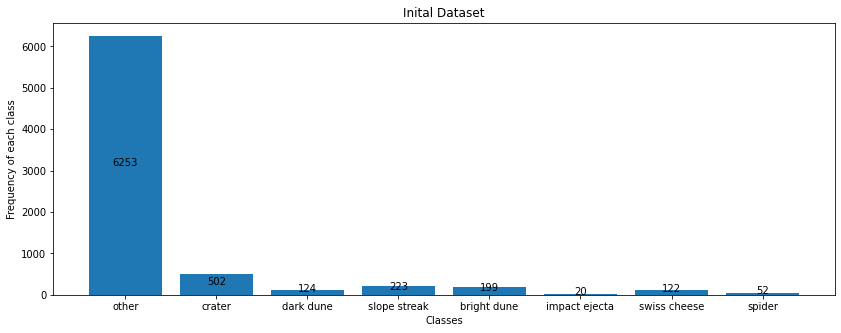

In [9]:
label_0 = len(labels[labels == 0])
label_1 = len(labels[labels == 1])
label_2 = len(labels[labels == 2])
label_3 = len(labels[labels == 3])
label_4 = len(labels[labels == 4])
label_5 = len(labels[labels == 5])
label_6 = len(labels[labels == 6])
label_7 = len(labels[labels == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Inital Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

#print(label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7)

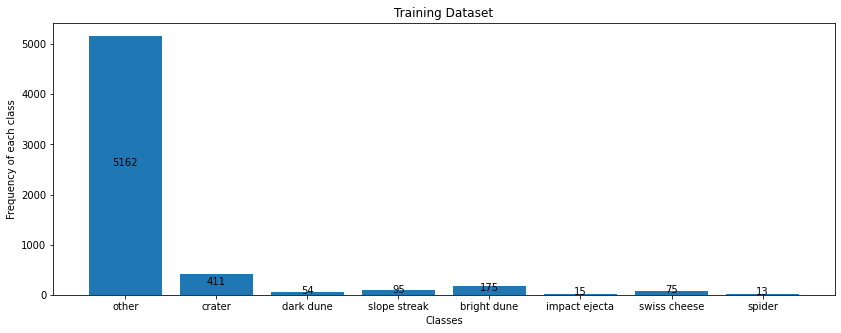

In [10]:
label_0 = len(train_y[train_y == 0])
label_1 = len(train_y[train_y == 1])
label_2 = len(train_y[train_y == 2])
label_3 = len(train_y[train_y == 3])
label_4 = len(train_y[train_y == 4])
label_5 = len(train_y[train_y == 5])
label_6 = len(train_y[train_y == 6])
label_7 = len(train_y[train_y == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

#print(label_0,label_1,label_2,label_3,label_4)

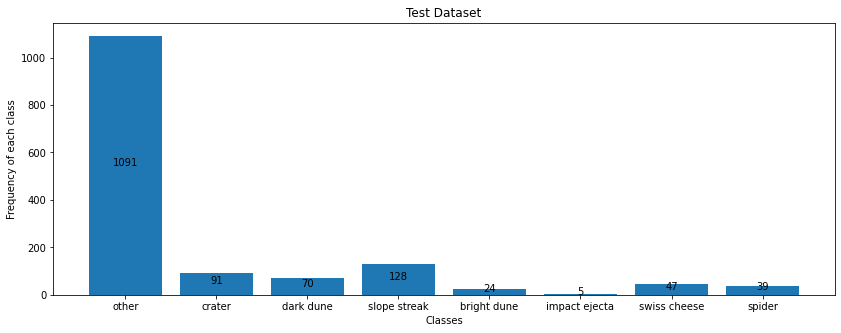

1091 91 70 128 24


In [11]:
label_0 = len(test_y[test_y == 0])
label_1 = len(test_y[test_y == 1])
label_2 = len(test_y[test_y == 2])
label_3 = len(test_y[test_y == 3])
label_4 = len(test_y[test_y == 4])
label_5 = len(test_y[test_y == 5])
label_6 = len(test_y[test_y == 6])
label_7 = len(test_y[test_y == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Test Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

print(label_0,label_1,label_2,label_3,label_4)

In [15]:
import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Define some constants.
NUM_CLASSES = 8
BATCH_SIZE = 16

In [14]:
print(train_x.shape)

(6000, 227, 227)


In [13]:
# Normalizing the dataset
train_x = keras.utils.all_utils.normalize(train_x, axis=1)
test_x = keras.utils.all_utils.normalize(test_x, axis=1)

# Class vectors are converted to binary class matrices
train_y = keras.utils.all_utils.to_categorical(train_y, NUM_CLASSES)
test_y =keras.utils.all_utils.to_categorical(test_y, NUM_CLASSES)
print(len(train_y[0]))

K.set_image_data_format('channels_first')

# Data reshape
train_x = train_x.reshape(train_x.shape[0], 1, 227, 227)
test_x =  test_x.reshape(test_x.shape[0], 1, 227, 227)

8


In [16]:
#from art.estimators.classification import KerasClassifier
# Training a CNN-based model using the NASA Dataset
nasa_model = Sequential()

# Define the intermediate layers.
nasa_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(1,227,227)))
nasa_model.add(Conv2D(64,(3,3), activation='relu'))
nasa_model.add(MaxPooling2D(pool_size=(2,2)))
nasa_model.add(Dropout(0.25))
nasa_model.add(Flatten())
nasa_model.add(Dense(128,activation='relu'))
nasa_model.add(Dropout(0.5))

nasa_model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
nasa_model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
#nasa_model = KerasClassifier(model=nasa_model, clip_values=(0,1))


# Fit the model
nasa_model.fit(train_x, train_y, epochs=18, batch_size=BATCH_SIZE)

Train on 6000 samples
Epoch 1/18
6000/6000 [==============================] - 87s 15ms/sample - loss: 0.7103 - accuracy: 0.8565
Epoch 2/18
6000/6000 [==============================] - 86s 14ms/sample - loss: 0.6627 - accuracy: 0.8603
Epoch 3/18
6000/6000 [==============================] - 86s 14ms/sample - loss: 0.6544 - accuracy: 0.8603
Epoch 4/18
6000/6000 [==============================] - 84s 14ms/sample - loss: 0.6501 - accuracy: 0.8603
Epoch 5/18
6000/6000 [==============================] - 84s 14ms/sample - loss: 0.6317 - accuracy: 0.8603
Epoch 6/18
6000/6000 [==============================] - 84s 14ms/sample - loss: 0.6171 - accuracy: 0.8607
Epoch 7/18
6000/6000 [==============================] - 84s 14ms/sample - loss: 0.5986 - accuracy: 0.8620
Epoch 8/18
6000/6000 [==============================] - 84s 14ms/sample - loss: 0.5772 - accuracy: 0.8637
Epoch 9/18
6000/6000 [==============================] - 84s 14ms/sample - loss: 0.5367 - accuracy: 0.8650
Epoch 10/18
6000/6000 [=

In [23]:
# Testing model on test dataset
predictions = nasa_model.predict(test_x)
count = 0
freq = dict()
for i in range(test_x.shape[0]):
  if np.where(predictions[i] == max(predictions[i]))[0][0] == np.where(test_y[i] == max(test_y[i]))[0][0]:
    class_type = np.where(predictions[i] == max(predictions[i]))[0][0]
    if class_type not in freq:
      freq[class_type] = i
    count+=1
accuracy = count/test_x.shape[0]
print('Accuracy of the model = {}'.format(accuracy))

Accuracy of the model = 0.7384615384615385


In [24]:
from google.colab.patches import cv2_imshow
print(freq)

{0: 0, 1: 72, 2: 81, 4: 430, 6: 1083}


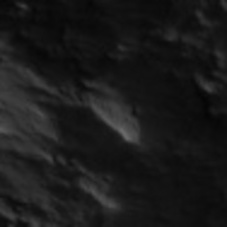

Prediction: other


In [35]:
cv2_imshow(test_set[0])
print("Model Prediction:",df["Class"][0])

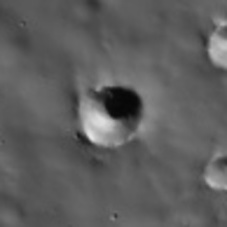

Model Prediction: crater


In [38]:
cv2_imshow(test_set[72])
print("Model Prediction:",df["Class"][1])

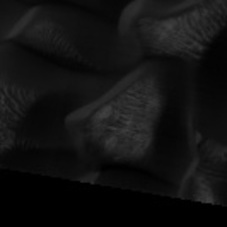

Model Prediction: dark dune


In [39]:
cv2_imshow(test_set[81])
print("Model Prediction:",df["Class"][2])

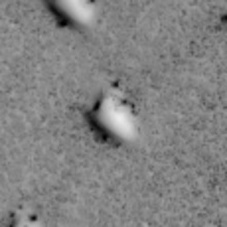

Model Prediction: bright dune


In [40]:
cv2_imshow(test_set[430])
print("Model Prediction:",df["Class"][4])

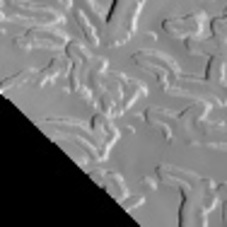

Model Prediction: swiss cheese


In [41]:
cv2_imshow(test_set[1083])
print("Model Prediction:",df["Class"][6])